# Interannotator Agreement

In [26]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import simpledorff
import math


In [27]:
# Load Combined_Data.xlsx
combined_data = pd.read_excel('Combined_Data.xlsx')

# GSM8k data - limit to task = "gsm8k"
gsm8k_data = combined_data[combined_data['task'] == 'gsm8k']

# Creative writing data - limit to task = "cw"
cw_data = combined_data[combined_data['task'] == 'cw']

# Load direct_prompting_comparison.xlsx
direct_prompting_comparison = pd.read_excel('direct_prompting_comparison.xlsx')


In [28]:
print(cw_data.columns)


Index(['model_task_method', 'conversation_number',
       'coherence_1_incoherent_10_very_coherent',
       'task_constraints_followed_0_not_followed_1_followed',
       'ease_of_review_1_easy_10_hard', 'correct',
       'Prediction_Based_On_First_10', 'Prediction_Based_On_Last_10',
       'Aggregated_Prediction', 'Prediction_Based_On_First_10_LP',
       'response_Based_On_First_10_LP', 'Prediction_Based_On_Last_10_LP',
       'response_Based_On_Last_10_LP', 'response_LP',
       'Aggregated_Prediction_LP', 'Prediction_Based_On_First_50_LP',
       'response_Based_On_First_50_LP', 'Prediction_Based_On_Last_50_LP',
       'response_Based_On_Last_50_LP', 'Aggregated_Prediction_50_LP',
       'Prediction_Based_On_random_50_LP_1',
       'response_Based_On_random_50_LP_1',
       'Prediction_Based_On_random_50_LP_2',
       'response_Based_On_random_50_LP_2',
       'Aggregated_Prediction_random_50_LP', 'Unnamed: 0_x', 'response_x',
       'replace_slash_n_slash_n_with_newline_x',
       

## Initial Checks on First-Pass Fine-Tuning Results

In [29]:
# Summary statistics for variables: coherence_1_incoherent_10_very_coherent, Prediction_Based_On_First_10, Prediction_Based_On_Last_10, Aggregated_Prediction
print(cw_data[['coherence_1_incoherent_10_very_coherent', 'Prediction_Based_On_First_10', 'Prediction_Based_On_Last_10', 'Aggregated_Prediction']].describe())


       coherence_1_incoherent_10_very_coherent  Prediction_Based_On_First_10  \
count                              1600.000000                   1440.000000   
mean                                  4.974375                      5.403472   
std                                   2.612563                      2.175833   
min                                   1.000000                      1.000000   
25%                                   3.000000                      3.000000   
50%                                   5.000000                      7.000000   
75%                                   7.000000                      7.000000   
max                                  10.000000                      8.000000   

       Prediction_Based_On_Last_10  Aggregated_Prediction  
count                  1440.000000            1600.000000  
mean                      4.066667               4.722500  
std                       2.569885               2.265422  
min                       1.000000     

DescribeResult(nobs=1600, minmax=(-7.0, 8.0), mean=0.251875, variance=5.838020247029392, skewness=-0.006411691981771768, kurtosis=0.18078123260822876)


(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

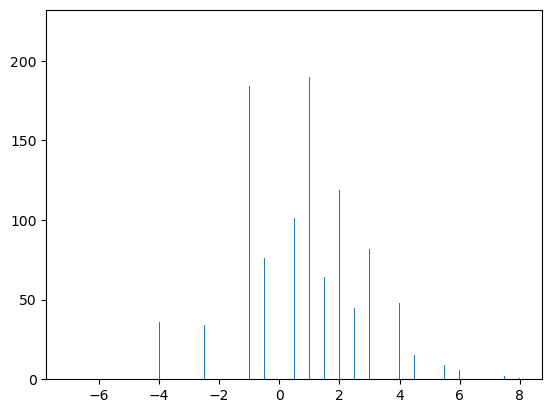

In [30]:
# Differences between coherence_1_incoherent_10_very_coherent and Aggregated_Prediction
print(stats.describe(cw_data['coherence_1_incoherent_10_very_coherent'] - cw_data['Aggregated_Prediction']))

# Histogram
plt.hist(cw_data['coherence_1_incoherent_10_very_coherent'] - cw_data['Aggregated_Prediction'], bins = 1000)


In [31]:
print(cw_data.columns)


Index(['model_task_method', 'conversation_number',
       'coherence_1_incoherent_10_very_coherent',
       'task_constraints_followed_0_not_followed_1_followed',
       'ease_of_review_1_easy_10_hard', 'correct',
       'Prediction_Based_On_First_10', 'Prediction_Based_On_Last_10',
       'Aggregated_Prediction', 'Prediction_Based_On_First_10_LP',
       'response_Based_On_First_10_LP', 'Prediction_Based_On_Last_10_LP',
       'response_Based_On_Last_10_LP', 'response_LP',
       'Aggregated_Prediction_LP', 'Prediction_Based_On_First_50_LP',
       'response_Based_On_First_50_LP', 'Prediction_Based_On_Last_50_LP',
       'response_Based_On_Last_50_LP', 'Aggregated_Prediction_50_LP',
       'Prediction_Based_On_random_50_LP_1',
       'response_Based_On_random_50_LP_1',
       'Prediction_Based_On_random_50_LP_2',
       'response_Based_On_random_50_LP_2',
       'Aggregated_Prediction_random_50_LP', 'Unnamed: 0_x', 'response_x',
       'replace_slash_n_slash_n_with_newline_x',
       

In [32]:
# Krippendorff's alpha
# I am using the simpledorff package
# experiment_col should be the conversation (row of the dataframe) - create model_task_method_conversation_id
# annotator_col should be 'Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10'
# class col should be the score from coherence_1_incoherent_10_very_coherent, Prediction_Based_On_First_10, Prediction_Based_On_Last_10

# Manipulate and reshape dataframe
cw_data['model_task_method_conversation_id'] = cw_data['model'] + '_' + cw_data['task'] + '_' + cw_data['method'] + '_' + cw_data['conversation_number'].astype(str)
cw_data['Human'] = cw_data['coherence_1_incoherent_10_very_coherent']
cw_data['GPT-3.5 - First 10'] = cw_data['Prediction_Based_On_First_10']
cw_data['GPT-3.5 - Last 10'] = cw_data['Prediction_Based_On_Last_10']
ka_data = cw_data[['model_task_method_conversation_id', 'Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10']]
ka_data_melted = ka_data.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10'])
ka_data_melted = ka_data_melted.rename(columns={'variable': 'grader', 'value': 'coherence_score'})

# Calculate Krippendorff's alpha
print('overall KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_melted,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))

# Version excluding first 10
ka_data_no_first_10 = cw_data[cw_data['conversation_number'] > 10][['model_task_method_conversation_id', 'Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10']]
ka_data_no_first_10_melted = ka_data_no_first_10.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10'])
ka_data_no_first_10_melted = ka_data_no_first_10_melted.rename(columns={'variable': 'grader', 'value': 'coherence_score'})
print('no first 10 KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_no_first_10_melted,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))

# Version excluding last 10
ka_data_no_last_10 = cw_data[cw_data['conversation_number'] <= 90][['model_task_method_conversation_id', 'Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10']]
ka_data_no_last_10_melted = ka_data_no_last_10.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10'])
ka_data_no_last_10_melted = ka_data_no_last_10_melted.rename(columns={'variable': 'grader', 'value': 'coherence_score'})
print('no last 10 KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_no_last_10_melted,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))

# Version excluding first and last 10
ka_data_no_first_last_10 = cw_data[(cw_data['conversation_number'] > 10) & (cw_data['conversation_number'] <= 90)][['model_task_method_conversation_id', 'Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10']]
ka_data_no_first_last_10_melted = ka_data_no_first_last_10.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'GPT-3.5 - First 10', 'GPT-3.5 - Last 10'])
ka_data_no_first_last_10_melted = ka_data_no_first_last_10_melted.rename(columns={'variable': 'grader', 'value': 'coherence_score'})
print('no first and last 10 KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_no_first_last_10_melted,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


overall KA
0.10686929311619198
no first 10 KA


C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\1729583903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['model_task_method_conversation_id'] = cw_data['model'] + '_' + cw_data['task'] + '_' + cw_data['method'] + '_' + cw_data['conversation_number'].astype(str)
C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\1729583903.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['Human'] = cw_data['coherence_1_incoherent_10_very_coherent']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\1

0.10782815485733388
no last 10 KA
0.11024510661584563
no first and last 10 KA
0.11158211702182685


In [33]:
# Try aggregated predictions
ka_data_agg = cw_data[['model_task_method_conversation_id', 'Human', 'Aggregated_Prediction']]
ka_data_agg_melted = ka_data_agg.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'Aggregated_Prediction'])
ka_data_agg_melted = ka_data_agg_melted.rename(columns={'variable': 'grader', 'value': 'coherence_score'})
print('aggregated predictions KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_agg_melted,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


aggregated predictions KA
0.04803932294886726


In [34]:
# Try to demand less of the data - in ka_data_melted, bin 1-10 into 1-5
# Divide by 2 and take the ceiling
ka_data_melted['coherence_1_to_5'] = ka_data_melted.dropna()['coherence_score'].apply(lambda x: math.ceil(x/2))

# Calculate Krippendorff's alpha
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_melted,
                                                       experiment_col='model_task_method_conversation_id',
                                                       annotator_col='grader',
                                                       class_col='coherence_1_to_5'))


0.18525258256529475


In [35]:
# Try coherence on a scale of 1 to 3
ka_data_melted['coherence_1_to_3'] = ka_data_melted.dropna()['coherence_score'].apply(lambda x: math.ceil(x/3.33))

# Calculate Krippendorff's alpha
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_melted,
                                                       experiment_col='model_task_method_conversation_id',
                                                       annotator_col='grader',
                                                       class_col='coherence_1_to_3'))


0.2735720914000721


In [36]:
# Try coherence vs incoherence binary
ka_data_melted['coherence_binary'] = ka_data_melted.dropna()['coherence_score'].apply(lambda x: 1 if x > 5 else 0)

# Calculate Krippendorff's alpha
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_melted,
                                                       experiment_col='model_task_method_conversation_id',
                                                       annotator_col='grader',
                                                       class_col='coherence_binary'))


0.4195238892015637


## Fine-tuning with longer prompts

In [37]:
# Manipulate and reshape dataframe
cw_data['GPT-3.5 - First 10 - LP'] = cw_data['Prediction_Based_On_First_10_LP']
cw_data['GPT-3.5 - Last 10 - LP'] = cw_data['Prediction_Based_On_Last_10_LP']
ka_data_lp = cw_data[['model_task_method_conversation_id', 'Human', 'GPT-3.5 - First 10 - LP', 'GPT-3.5 - Last 10 - LP']]
ka_data_melted_lp = ka_data_lp.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'GPT-3.5 - First 10 - LP', 'GPT-3.5 - Last 10 - LP'])
ka_data_melted_lp = ka_data_melted_lp.rename(columns={'variable': 'grader', 'value': 'coherence_score'})

# Calculate Krippendorff's alpha
print('overall KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_melted_lp,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


overall KA
0.14655382629441482


C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\800768595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['GPT-3.5 - First 10 - LP'] = cw_data['Prediction_Based_On_First_10_LP']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\800768595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['GPT-3.5 - Last 10 - LP'] = cw_data['Prediction_Based_On_Last_10_LP']


In [38]:
# Try aggregated predictions
ka_data_agg_lp = cw_data[['model_task_method_conversation_id', 'Human', 'Aggregated_Prediction_LP']]
ka_data_agg_melted_lp = ka_data_agg_lp.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'Aggregated_Prediction_LP'])
ka_data_agg_melted_lp = ka_data_agg_melted_lp.rename(columns={'variable': 'grader', 'value': 'coherence_score'})
print('aggregated predictions KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_agg_melted_lp,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


aggregated predictions KA
0.06459910514503153


### Using half the data

In [39]:
# Manipulate and reshape dataframe
cw_data['GPT-3.5 - First 50 - LP'] = cw_data['Prediction_Based_On_First_50_LP']
cw_data['GPT-3.5 - Last 50 - LP'] = cw_data['Prediction_Based_On_Last_50_LP']
ka_data_lp_50 = cw_data[['model_task_method_conversation_id', 'Human', 'GPT-3.5 - First 50 - LP', 'GPT-3.5 - Last 50 - LP']]
ka_data_melted_lp_50 = ka_data_lp_50.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'GPT-3.5 - First 50 - LP', 'GPT-3.5 - Last 50 - LP'])
ka_data_melted_lp_50 = ka_data_melted_lp_50.rename(columns={'variable': 'grader', 'value': 'coherence_score'})

# Calculate Krippendorff's alpha
print('overall KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_melted_lp_50,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


overall KA
0.14723679091121322


C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\672138764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['GPT-3.5 - First 50 - LP'] = cw_data['Prediction_Based_On_First_50_LP']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\672138764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['GPT-3.5 - Last 50 - LP'] = cw_data['Prediction_Based_On_Last_50_LP']


In [40]:
print(cw_data.columns)


Index(['model_task_method', 'conversation_number',
       'coherence_1_incoherent_10_very_coherent',
       'task_constraints_followed_0_not_followed_1_followed',
       'ease_of_review_1_easy_10_hard', 'correct',
       'Prediction_Based_On_First_10', 'Prediction_Based_On_Last_10',
       'Aggregated_Prediction', 'Prediction_Based_On_First_10_LP',
       'response_Based_On_First_10_LP', 'Prediction_Based_On_Last_10_LP',
       'response_Based_On_Last_10_LP', 'response_LP',
       'Aggregated_Prediction_LP', 'Prediction_Based_On_First_50_LP',
       'response_Based_On_First_50_LP', 'Prediction_Based_On_Last_50_LP',
       'response_Based_On_Last_50_LP', 'Aggregated_Prediction_50_LP',
       'Prediction_Based_On_random_50_LP_1',
       'response_Based_On_random_50_LP_1',
       'Prediction_Based_On_random_50_LP_2',
       'response_Based_On_random_50_LP_2',
       'Aggregated_Prediction_random_50_LP', 'Unnamed: 0_x', 'response_x',
       'replace_slash_n_slash_n_with_newline_x',
       

In [41]:
# Try aggregated predictions
ka_data_agg_lp_50 = cw_data[['model_task_method_conversation_id', 'Human', 'Aggregated_Prediction_50_LP']]
ka_data_agg_melted_lp_50 = ka_data_agg_lp_50.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'Aggregated_Prediction_50_LP'])
ka_data_agg_melted_lp_50 = ka_data_agg_melted_lp_50.rename(columns={'variable': 'grader', 'value': 'coherence_score'})
print('aggregated predictions KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_agg_melted_lp_50,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


aggregated predictions KA
0.14723679091121322


### Using random 50% split

In [42]:
# Manipulate and reshape dataframe
cw_data['GPT-3.5 - Random 50 - LP - 1'] = cw_data['Prediction_Based_On_random_50_LP_1']
cw_data['GPT-3.5 - Random 50 - LP - 2'] = cw_data['Prediction_Based_On_random_50_LP_2']
ka_data_random_lp_50 = cw_data[['model_task_method_conversation_id', 'Human', 'GPT-3.5 - Random 50 - LP - 1', 'GPT-3.5 - Random 50 - LP - 2']]
ka_data_melted_random_lp_50 = ka_data_random_lp_50.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'GPT-3.5 - Random 50 - LP - 1', 'GPT-3.5 - Random 50 - LP - 2'])
ka_data_melted_random_lp_50 = ka_data_melted_random_lp_50.rename(columns={'variable': 'grader', 'value': 'coherence_score'})

# Calculate Krippendorff's alpha
print('overall KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_melted_random_lp_50,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


overall KA
0.16701274040997383


C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\2104129242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['GPT-3.5 - Random 50 - LP - 1'] = cw_data['Prediction_Based_On_random_50_LP_1']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_27760\2104129242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['GPT-3.5 - Random 50 - LP - 2'] = cw_data['Prediction_Based_On_random_50_LP_2']


In [43]:
# Try aggregated predictions
ka_data_agg_random_lp_50 = cw_data[['model_task_method_conversation_id', 'Human', 'Aggregated_Prediction_random_50_LP']]
ka_data_agg_melted_random_lp_50 = ka_data_agg_random_lp_50.melt(id_vars=['model_task_method_conversation_id'], value_vars=['Human', 'Aggregated_Prediction_random_50_LP'])
ka_data_agg_melted_random_lp_50 = ka_data_agg_melted_random_lp_50.rename(columns={'variable': 'grader', 'value': 'coherence_score'})
print('aggregated predictions KA')
print(simpledorff.calculate_krippendorffs_alpha_for_df(ka_data_agg_melted_random_lp_50,
                                                 experiment_col='model_task_method_conversation_id',
                                                 annotator_col='grader',
                                                 class_col='coherence_score'))


aggregated predictions KA
0.16701274040997383


### Investigate Preferences

Best KA is the last one. See how often it has similar preferences to human coherence score.

In [44]:
human_and_agg_random_lp_50 = cw_data[['model', 'task', 'method', 'conversation_number', 'Human', 'Aggregated_Prediction_random_50_LP']]

# Human maxes
# By model, task, conversation_number, keep the row with the max Human score
human_maxes = human_and_agg_random_lp_50.groupby(['model', 'task', 'conversation_number'])['Human'].max().reset_index() 
#print(human_maxes)
# Inner join with human_and_agg_random_lp_50
human_max_rows = pd.merge(human_maxes, human_and_agg_random_lp_50, how='inner', on=['model', 'task', 'conversation_number', 'Human'])[['model', 'task', 'method', 'conversation_number', 'Human']].rename(columns = {'method': 'human_preferred_method'})

# Aggregated maxes
# By model, task, conversation_number, keep the row with the max Aggregated_Prediction_random_50_LP score
agg_maxes = human_and_agg_random_lp_50.groupby(['model', 'task', 'conversation_number'])['Aggregated_Prediction_random_50_LP'].max().reset_index()
#print(agg_maxes)
# Inner join with human_and_agg_random_lp_50
agg_max_rows = pd.merge(agg_maxes, human_and_agg_random_lp_50, how='inner', on=['model', 'task', 'conversation_number', 'Aggregated_Prediction_random_50_LP'])[['model', 'task', 'method', 'conversation_number', 'Aggregated_Prediction_random_50_LP']].rename(columns = {'method': 'agg_preferred_method'})

# Inner join human_max_rows and agg_max_rows
human_and_agg_random_lp_50_maxes = pd.merge(human_max_rows, agg_max_rows, how='inner', on=['model', 'task', 'conversation_number'])
print(human_and_agg_random_lp_50_maxes)


    model task human_preferred_method  conversation_number  Human  \
0    gpt4   cw        tree_of_thought                    1    9.0   
1    gpt4   cw        tree_of_thought                    1    9.0   
2    gpt4   cw        manual_few_shot                    2    9.0   
3    gpt4   cw        manual_few_shot                    2    9.0   
4    gpt4   cw        manual_few_shot                    2    9.0   
..    ...  ...                    ...                  ...    ...   
789   td3   cw          zero_shot_cot                   97    6.0   
790   td3   cw          zero_shot_cot                   97    6.0   
791   td3   cw          zero_shot_cot                   98    9.0   
792   td3   cw        manual_few_shot                   99    8.0   
793   td3   cw          zero_shot_cot                  100    9.0   

    agg_preferred_method  Aggregated_Prediction_random_50_LP  
0        tree_of_thought                                 8.0  
1             manual_cot                     

In [53]:
# Note there are ties

# How many unique model, task, conversation_number combinations are there?
print('unique model, task, conversation_number combinations')
unique_mtcn_combs = len(cw_data.groupby(['model', 'task', 'conversation_number']).size())
print(unique_mtcn_combs)
# Should be 2 * 100 = 200, good

# For how many groupings is there at least one row where human_preferred_method == agg_preferred_method?
print('groupings where at least one human_preferred_method == agg_preferred_method')
g_atl_one_human_eq_agg = len(human_and_agg_random_lp_50_maxes[human_and_agg_random_lp_50_maxes['human_preferred_method'] == human_and_agg_random_lp_50_maxes['agg_preferred_method']].groupby(['model', 'task', 'conversation_number']).size())
print(g_atl_one_human_eq_agg)

# Probability
print('probability of group having at least one human_preferred_method == agg_preferred_method')
p_atl_one_human_eq_agg = g_atl_one_human_eq_agg / unique_mtcn_combs
print(p_atl_one_human_eq_agg)

# Average number of rows per grouping
import numpy as np
print('average number of combinations of methods that are the max for both groups')
print(np.mean(human_and_agg_random_lp_50_maxes[human_and_agg_random_lp_50_maxes['human_preferred_method'] == human_and_agg_random_lp_50_maxes['agg_preferred_method']].drop_duplicates().groupby(['model', 'task', 'conversation_number']).size()))


unique model, task, conversation_number combinations
200
groupings where at least one human_preferred_method == agg_preferred_method
116
probability of group having at least one human_preferred_method == agg_preferred_method
0.58
average number of combinations of methods that are the max for both groups
1.3362068965517242


In [46]:
print(human_and_agg_random_lp_50_maxes[human_and_agg_random_lp_50_maxes['human_preferred_method'] == human_and_agg_random_lp_50_maxes['agg_preferred_method']])


    model task human_preferred_method  conversation_number  Human  \
0    gpt4   cw        tree_of_thought                    1    9.0   
6    gpt4   cw        manual_few_shot                    2    9.0   
11   gpt4   cw      ape_zero_shot_cot                    4    8.0   
17   gpt4   cw             manual_cot                    5    9.0   
21   gpt4   cw          zero_shot_cot                    7    9.0   
..    ...  ...                    ...                  ...    ...   
774   td3   cw          least_to_most                   87    8.0   
776   td3   cw             manual_cot                   88    3.0   
781   td3   cw        manual_few_shot                   93    3.0   
788   td3   cw            self_refine                   96    9.0   
792   td3   cw        manual_few_shot                   99    8.0   

    agg_preferred_method  Aggregated_Prediction_random_50_LP  
0        tree_of_thought                                 8.0  
6        manual_few_shot                     

### A brief (very tentative, heavy on assumptions, and possibly wrong) simulation study of the share of groupings where at least one human preferred method is equal to an aggregate preferred method

In [47]:
# There are 8 methods
# Agreement odds of 1/8 * 1/8 by chance under independent uniforms (without account for score values)
# More complicated if you consider chances with 1-10 due to taking of means leading to multiple methods getting same scores

# By chance, how often would you expect to see agreement on this scale
# Tons of other baked in assumptions and such here but just a heuristic
import random
# Set seed
random.seed(201)
# Set up simulations
num_sims = 1000000
# Indicators for if at least one index of max method_human_scores == index of max of method_agg_scores
at_least_one_idx_max_human_agg_equal = []
# For each simulation - roughly equalivalent to a model, task, conversation_number combination
for _ in range(num_sims):
    # For each method, draw human score as number from 1 to 10, uniform
    method_human_scores = [random.randint(1, 10) for _ in range(8)]
    # Draw agg score component 1 as number from 1 to 10, uniform
    method_agg_component_1_scores = [random.randint(1, 10) for _ in range(8)]
    # Draw agg score 2 as number from 1 to 10, uniform
    method_agg_component_2_scores = [random.randint(1, 10) for _ in range(8)]
    # Aggregate agg scores
    method_agg_scores = [(sum(x) / 2) for x in zip(method_agg_component_1_scores, method_agg_component_2_scores)]
    # Get indices of max human score
    indices_max_human_score = [i for i, x in enumerate(method_human_scores) if x == max(method_human_scores)]
    # Get indices of max agg score
    indices_max_agg_score = [i for i, x in enumerate(method_agg_scores) if x == max(method_agg_scores)]
    # Append indicator for sharing at least one index
    at_least_one_idx_max_human_agg_equal.append(len(set(indices_max_human_score).intersection(indices_max_agg_score)) > 0)
    
# Simulation probability of agreement
print('simulation probability of agreement')
print(np.mean(at_least_one_idx_max_human_agg_equal))


simulation probability of agreement
0.211997


In [48]:
# We really should draw from something like the probability distribution of actual scores...
# For each method, calculate distribution of Human and Aggregated_Prediction_random_50_LP
# Then, for each model, task, conversation_number combination, draw from those distributions

method_human_distributions = []
method_lp_1_distributions = []
method_lp_2_distributions = []
for method in cw_data['method'].unique():
    # Load data for method
    method_data = cw_data[cw_data['method'] == method]
    # Get counts of each value of Human as a list
    method_human_counts = []
    for value in range(1, 11):
        method_human_counts.append(len(method_data[method_data['Human'] == value]))
    # Divide by sum to get probabilities
    method_human_probs = [x / sum(method_human_counts) for x in method_human_counts]
    # Append to method_human_distributions
    method_human_distributions.append(method_human_probs)
    # Get counts of each value of Prediction_Based_On_random_50_LP_1
    method_lp_1_counts = []
    for value in range(1, 11):
        method_lp_1_counts.append(len(method_data[method_data['Prediction_Based_On_random_50_LP_1'] == value]))
    # Divide by sum to get probabilities
    method_lp_1_probs = [x / sum(method_lp_1_counts) for x in method_lp_1_counts]
    # Append to method_human_distributions
    method_lp_1_distributions.append(method_lp_1_probs)
    # Get counts of each value of Prediction_Based_On_random_50_LP_2
    method_lp_2_counts = []
    for value in range(1, 11):
        method_lp_2_counts.append(len(method_data[method_data['Prediction_Based_On_random_50_LP_2'] == value]))
    # Divide by sum to get probabilities
    method_lp_2_probs = [x / sum(method_lp_2_counts) for x in method_lp_2_counts]
    # Append to method_human_distributions
    method_lp_2_distributions.append(method_lp_2_probs)
    
print(method_human_distributions)
print(method_lp_1_distributions)
print(method_lp_2_distributions)

# Set seed
random.seed(201)
# Set up simulations
num_sims = 1000000
# Indicators for if at least one index of max method_human_scores == index of max of method_agg_scores
at_least_one_idx_max_human_agg_equal_empirical = []
# number of shared maxes
num_shared_maxes = []
# For each simulation - roughly equalivalent to a model, task, conversation_number combination
for _ in range(num_sims):
    # For each method, draw human score as number from 1 to 10, uniform
    method_human_scores = [random.choices(range(1, 11), weights = method_human_distributions[i])[0] for i in range(8)]
    # Draw lp 1 and lp 2 scores
    lp_1_scores = [random.choices(range(1, 11), weights = method_lp_1_distributions[i])[0] for i in range(8)]
    lp_2_scores = [random.choices(range(1, 11), weights = method_lp_2_distributions[i])[0] for i in range(8)]
    # Aggregate scores
    method_agg_scores = [sum(x) / 2 for x in zip(lp_1_scores, lp_2_scores)]
    # Get indices of max human score
    indices_max_human_score = [i for i, x in enumerate(method_human_scores) if x == max(method_human_scores)]
    # Get indices of max agg score
    indices_max_agg_score = [i for i, x in enumerate(method_agg_scores) if x == max(method_agg_scores)]
    # Num shared maxes
    num_shared_maxes.append(len(set(indices_max_human_score).intersection(indices_max_agg_score)))
    # Append indicator for sharing at least one index
    at_least_one_idx_max_human_agg_equal_empirical.append(len(set(indices_max_human_score).intersection(indices_max_agg_score)) > 0)


[[0.135, 0.11, 0.11, 0.09, 0.09, 0.105, 0.09, 0.15, 0.07, 0.05], [0.135, 0.13, 0.11, 0.05, 0.095, 0.105, 0.105, 0.145, 0.1, 0.025], [0.13, 0.105, 0.155, 0.115, 0.085, 0.135, 0.1, 0.1, 0.07, 0.005], [0.04, 0.115, 0.205, 0.13, 0.105, 0.085, 0.115, 0.12, 0.06, 0.025], [0.06, 0.1, 0.12, 0.09, 0.095, 0.095, 0.135, 0.2, 0.08, 0.025], [0.095, 0.08, 0.11, 0.12, 0.115, 0.075, 0.175, 0.17, 0.04, 0.02], [0.105, 0.18, 0.21, 0.16, 0.065, 0.09, 0.08, 0.085, 0.025, 0.0], [0.145, 0.095, 0.085, 0.105, 0.11, 0.07, 0.13, 0.145, 0.08, 0.035]]
[[0.14, 0.11, 0.09, 0.04, 0.18, 0.05, 0.07, 0.22, 0.1, 0.0], [0.15, 0.18, 0.15, 0.03, 0.06, 0.03, 0.09, 0.3, 0.01, 0.0], [0.09, 0.23, 0.13, 0.04, 0.14, 0.01, 0.07, 0.28, 0.01, 0.0], [0.05, 0.11, 0.11, 0.13, 0.21, 0.08, 0.18, 0.12, 0.01, 0.0], [0.07, 0.14, 0.06, 0.05, 0.12, 0.04, 0.09, 0.39, 0.04, 0.0], [0.08, 0.11, 0.14, 0.04, 0.17, 0.05, 0.17, 0.21, 0.03, 0.0], [0.12, 0.2, 0.12, 0.04, 0.13, 0.06, 0.08, 0.22, 0.03, 0.0], [0.15, 0.15, 0.07, 0.05, 0.09, 0.03, 0.06, 0.3

In [51]:
# Simulation probability of agreement
print('simulation probability of agreement')
sim_prob_agreement_complex = np.mean(at_least_one_idx_max_human_agg_equal_empirical)
print(sim_prob_agreement_complex)
print('num shared maxes')
print(np.mean(num_shared_maxes))


simulation probability of agreement
0.23538
num shared maxes
0.241797


In [56]:
# A very psuedo-bootstrap against null distribution
bootstrap_draws = 1000000
empirical_prob_agreements = []
for _ in range(bootstrap_draws):
    # Draw 200 elements from at_least_one_idx_max_human_agg_equal_empirical
    bootstrap_sample = random.choices(at_least_one_idx_max_human_agg_equal_empirical, k = 200)
    # Append mean of bootstrap sample
    empirical_prob_agreements.append(np.mean(bootstrap_sample))


In [57]:
# What quantile is p_atl_one_human_eq_agg in empirical_prob_agreements?
print('quantile of p_atl_one_human_eq_agg in empirical_prob_agreements')
print(stats.percentileofscore(empirical_prob_agreements, p_atl_one_human_eq_agg))


quantile of p_atl_one_human_eq_agg in empirical_prob_agreements
100.0
